<a href="https://colab.research.google.com/github/pieva/SimPy/blob/main/Basic_Network_Simulations_and_Beyond_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic Network Simulations and Beyond in Python
### Ref: https://www.grotto-networking.com/DiscreteEventPython.html

## Random Variables in Python and SciPy


In [ ]:
# Import the random module to generate random numbers
import random

# Print a single sample from a uniform random variable (between 0 and 1)
print("Here is a single sample from a uniform random variable")
print(random.random())

# Generate and print a list of three samples from a uniform random variable
print("Here is a list of three samples:")
uniSamples = [random.random(), random.random(), random.random()]
print(uniSamples)

# Generate and print a list of three samples from an exponential distribution with lambda=1.0
print("Here is a list of three exponential samples:")
expSamples = [random.expovariate(1.0), random.expovariate(1.0), random.expovariate(1.0)]
print(expSamples)

Here is a single sample from a uniform random variable
0.1732883556336412
Here is a list of three samples:
[0.37317428262177565, 0.8323025668028591, 0.43654557019471074]
Here is a list of three exponential samples:
[0.4006674731675782, 0.8734034891983032, 0.06862891178042889]


## Visualizing Distributions: Histograms with Matplotlib
### Generate uniform random variables and plot histogram

[0.2025308783103128, 0.050533463860857775, 0.2761442886834169, 0.5739716829286028, 0.7388750916425297, 0.343944713482886, 0.18422553861847935, 0.4459885120828434, 0.3561851645922637, 0.29541557639841176]


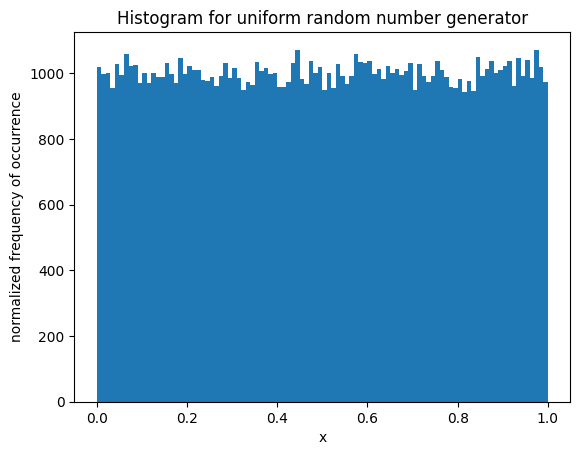

In [ ]:
# Import necessary libraries
import random
import matplotlib.pyplot as plt

# Generate a list of 100,000 samples from a uniform random variable in the range [0, 1)
uniSamples = [random.random() for i in range(100000)]

# Print the first 10 samples to take a look at them
print(uniSamples[0:10])

# Create a histogram to visualize the distribution of uniform random samples
fig, axis = plt.subplots()
axis.hist(uniSamples, bins=100)  # 'bins=100' specifies the number of bins in the histogram
axis.set_title("Histogram for uniform random number generator")
axis.set_xlabel("x")
axis.set_ylabel("normalized frequency of occurrence")

# Uncomment the line below to save the histogram plot as an image (e.g., PNG file)
# fig.savefig("UniformHistogram.png")

# Display the histogram plot
plt.show()


### Generate Normal random variables and plot histogram

[8.623695676888786, 8.604484929683727, 10.273152972490196, 8.698907947758954, 6.968849223217432, 13.341978461975746, 11.938938276315579, 7.597107677079045, 8.467719322484122, 11.076209117322989]


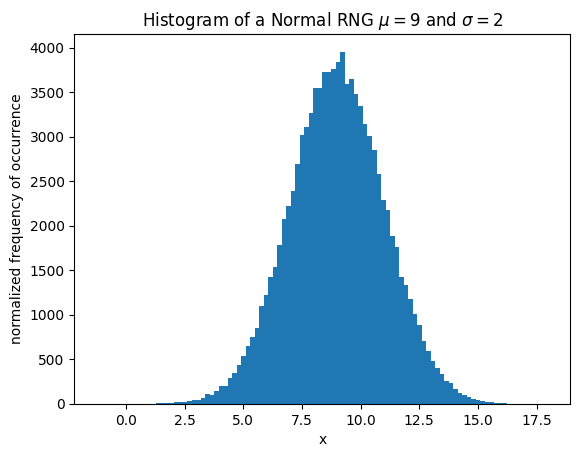

In [ ]:
# Import necessary libraries
import random
import matplotlib.pyplot as plt

# Generate a list of 100,000 samples from a normal random variable with mean 9.0 and standard deviation 2.0
normSamples = [random.normalvariate(9.0, 2.0) for i in range(100000)]

# Print the first 10 samples to take a look at them
print(normSamples[0:10])

# Create a histogram to visualize the distribution of normal random samples
fig, axis = plt.subplots()
axis.hist(normSamples, bins=100)  # 'bins=100' specifies the number of bins in the histogram
axis.set_title(r"Histogram of a Normal RNG $\mu = 9$ and $\sigma = 2$")
axis.set_xlabel("x")
axis.set_ylabel("normalized frequency of occurrence")

# Display the histogram plot
plt.show()


## Two Packet Generators and a Sink

In [ ]:
"""
Simple example of PacketGenerator and PacketSink from the SimComponents module.
Creates two constant rate packet generators and wires them to one sink.
Copyright 2014 Dr. Greg M. Bernstein
Released under the MIT license
"""
!pip install simpy
from random import expovariate
import simpy
from SimComponents import PacketGenerator, PacketSink


def constArrival():  # Constant arrival distribution for generator 1
    return 1.5

def constArrival2():
    return 2.0

def distSize():
    return expovariate(0.01)

if __name__ == '__main__':
    env = simpy.Environment()  # Create the SimPy environment
    # Create the packet generators and sink
    ps = PacketSink(env, debug=True)  # debugging enable for simple output
    pg = PacketGenerator(env, "EE283", constArrival, distSize)
    pg2 = PacketGenerator(env, "SJSU", constArrival2, distSize)
    # Wire packet generators and sink together
    pg.out = ps
    pg2.out = ps
    env.run(until=20) # Run it

id: 1, src: EE283, time: 1.5, size: 294.7852930966622
id: 1, src: SJSU, time: 2.0, size: 183.29872531735953
id: 2, src: EE283, time: 3.0, size: 168.33288214833226
id: 2, src: SJSU, time: 4.0, size: 76.66966476639533
id: 3, src: EE283, time: 4.5, size: 6.294182717066968
id: 3, src: SJSU, time: 6.0, size: 78.83863351885992
id: 4, src: EE283, time: 6.0, size: 18.964194817513043
id: 5, src: EE283, time: 7.5, size: 130.84639563507952
id: 4, src: SJSU, time: 8.0, size: 207.87655563163375
id: 6, src: EE283, time: 9.0, size: 27.500253527166993
id: 5, src: SJSU, time: 10.0, size: 107.01312736308617
id: 7, src: EE283, time: 10.5, size: 122.17557998543846
id: 6, src: SJSU, time: 12.0, size: 122.5899755702979
id: 8, src: EE283, time: 12.0, size: 123.06534026760505
id: 9, src: EE283, time: 13.5, size: 25.53723903055779
id: 7, src: SJSU, time: 14.0, size: 110.72953783804917
id: 10, src: EE283, time: 15.0, size: 408.8999918728988
id: 8, src: SJSU, time: 16.0, size: 4.461764429165425
id: 11, src: EE28

##  Overloaded Switch Port

In [ ]:
"""
Simple example of PacketGenerator, SwitchPort, and PacketSink from the SimComponents module.
Creates constant rate packet generator, connects it to a slow switch port, and then
connects the switch port to a sink. The queue size is made small an the port speed slow
to verify packet drops.

Copyright 2014 Dr. Greg M. Bernstein
Released under the MIT license
"""
import simpy
from SimComponents import PacketGenerator, PacketSink, SwitchPort


def constArrival():
    return 1.5    # time interval

def constSize():
    return 100.0  # bytes

if __name__ == '__main__':
    env = simpy.Environment()  # Create the SimPy environment
    ps = PacketSink(env, debug=True) # debug: every packet arrival is printed
    pg = PacketGenerator(env, "SJSU", constArrival, constSize)
    switch_port = SwitchPort(env, rate=200.0, qlimit=300)
    # Wire packet generators and sinks together
    pg.out = switch_port
    switch_port.out = ps
    env.run(until=20)
    print("waits: {}".format(ps.waits))
    print("received: {}, dropped {}, sent {}".format(ps.packets_rec,
         switch_port.packets_drop, pg.packets_sent))

id: 1, src: SJSU, time: 1.5, size: 100.0
id: 2, src: SJSU, time: 3.0, size: 100.0
id: 3, src: SJSU, time: 4.5, size: 100.0
id: 4, src: SJSU, time: 6.0, size: 100.0
waits: [4.0, 6.5, 9.0, 11.5]
received: 4, dropped 6, sent 13


### An M/M/1 Queueing System

Last 10 waits: 0.909, 0.740, 2.836, 3.596, 0.692, 1.327, 0.822, 0.553, 0.425, 0.677
Last 10 queue sizes: [1, 0, 2, 1, 0, 1, 1, 2, 0, 1]
Last 10 sink arrival times: 2.031, 0.221, 2.105, 1.535, 1.924, 3.223, 0.035, 0.036, 0.496, 1.823
average wait = 1.199
received: 3996, dropped 0, sent 3996
loss rate: 0.0
average system occupancy: 0.606


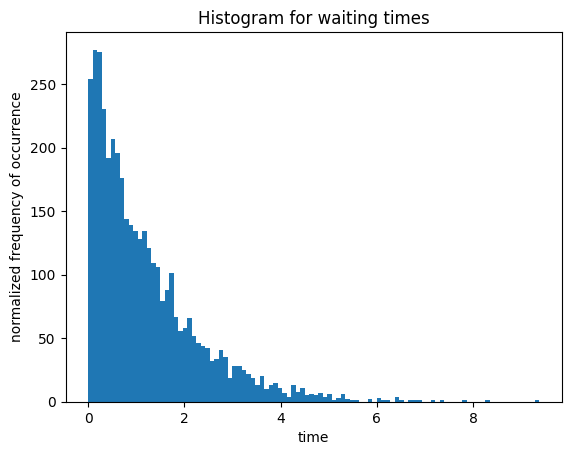

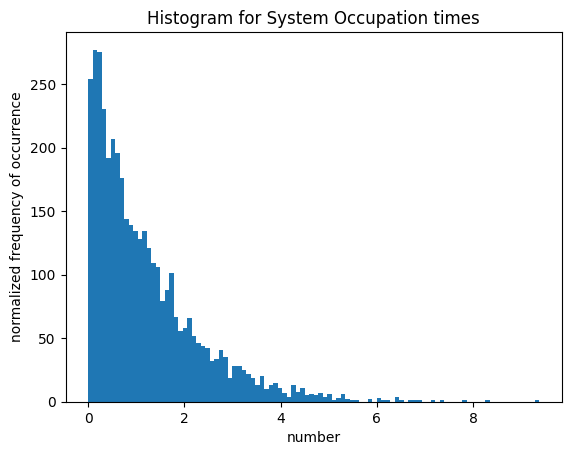

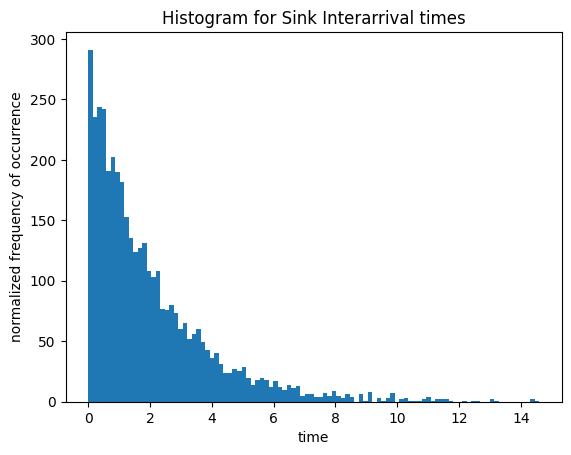

In [ ]:
"""
Example use of SimComponents to simulate a packet queue with M/M/1 characteristics.
Copyright 2014 Dr. Greg M. Bernstein
Released under the MIT license
"""

!pip install simpy

import random
import functools
import simpy
import matplotlib.pyplot as plt
from SimComponents import PacketGenerator, PacketSink, SwitchPort, PortMonitor


if __name__ == '__main__':
    # Set up arrival and packet size distributions
    # Using Python functools to create callable functions for random variates with fixed parameters.
    # each call to these will produce a new random value.
    adist = functools.partial(random.expovariate, 0.5)
    sdist = functools.partial(random.expovariate, 0.01)  # mean size 100 bytes
    samp_dist = functools.partial(random.expovariate, 1.0)
    port_rate = 1000.0

    env = simpy.Environment()  # Create the SimPy environment
    # Create the packet generators and sink
    ps = PacketSink(env, debug=False, rec_arrivals=True)
    pg = PacketGenerator(env, "Greg", adist, sdist)
    switch_port = SwitchPort(env, port_rate, qlimit=10000)
    # Using a PortMonitor to track queue sizes over time
    pm = PortMonitor(env, switch_port, samp_dist)
    # Wire packet generators, switch ports, and sinks together
    pg.out = switch_port
    switch_port.out = ps
    # Run it
    env.run(until=8000)
    print("Last 10 waits: "  + ", ".join(["{:.3f}".format(x) for x in ps.waits[-10:]]))
    print("Last 10 queue sizes: {}".format(pm.sizes[-10:]))
    print("Last 10 sink arrival times: " + ", ".join(["{:.3f}".format(x) for x in ps.arrivals[-10:]]))
    print("average wait = {:.3f}".format(sum(ps.waits)/len(ps.waits)))
    print("received: {}, dropped {}, sent {}".format(switch_port.packets_rec, switch_port.packets_drop, pg.packets_sent))
    print("loss rate: {}".format(float(switch_port.packets_drop)/switch_port.packets_rec))
    print("average system occupancy: {:.3f}".format(float(sum(pm.sizes))/len(pm.sizes)))

    fig, axis = plt.subplots()
    axis.hist(ps.waits, bins=100)
    axis.set_title("Histogram for waiting times")
    axis.set_xlabel("time")
    axis.set_ylabel("normalized frequency of occurrence")
    # fig.savefig("WaitHistogram.png")
    plt.show()

    fig, axis = plt.subplots()
    axis.hist(ps.waits, bins=100)
    axis.set_title("Histogram for System Occupation times")
    axis.set_xlabel("number")
    axis.set_ylabel("normalized frequency of occurrence")
    # fig.savefig("QueueHistogram.png")
    plt.show()

    fig, axis = plt.subplots()
    axis.hist(ps.arrivals, bins=100)
    axis.set_title("Histogram for Sink Interarrival times")
    axis.set_xlabel("time")
    axis.set_ylabel("normalized frequency of occurrence")
    # fig.savefig("ArrivalHistogram.png")
    plt.show()

## Simulating & Analyzing Networks of Queues


In [ ]:
"""
Use of SimComponents to simulate the network of queues from Homework #6 problem 1, Fall 2014.
See corresponding solution set for mean delay calculation based on Burkes theorem.

Copyright 2014 Dr. Greg M. Bernstein
Released under the MIT license
"""
import random
import functools

import simpy

from SimComponents import PacketGenerator, PacketSink, SwitchPort, RandomBrancher


if __name__ == '__main__':
    # Set up arrival and packet size distributions
    # Using Python functools to create callable functions for random variates with fixed parameters.
    # each call to these will produce a new random value.
    mean_pkt_size = 100.0  # in bytes
    adist1 = functools.partial(random.expovariate, 2.0)
    adist2 = functools.partial(random.expovariate, 0.5)
    adist3 = functools.partial(random.expovariate, 0.6)
    sdist = functools.partial(random.expovariate, 1.0/mean_pkt_size)
    samp_dist = functools.partial(random.expovariate, 0.50)
    port_rate = 2.2*8*mean_pkt_size  # want a rate of 2.2 packets per second

    # Create the SimPy environment. This is the thing that runs the simulation.
    env = simpy.Environment()

    # Create the packet generators and sink
    def selector(pkt):
        return pkt.src == "SJSU1"

    def selector2(pkt):
        return pkt.src == "SJSU2"
    ps1 = PacketSink(env, debug=False, rec_arrivals=True, selector=selector)
    ps2 = PacketSink(env, debug=False, rec_waits=True, selector=selector2)
    pg1 = PacketGenerator(env, "SJSU1", adist1, sdist)
    pg2 = PacketGenerator(env, "SJSU2", adist2, sdist)
    pg3 = PacketGenerator(env, "SJSU3", adist3, sdist)
    branch1 = RandomBrancher(env, [0.75, 0.25])
    branch2 = RandomBrancher(env, [0.65, 0.35])
    switch_port1 = SwitchPort(env, port_rate)
    switch_port2 = SwitchPort(env, port_rate)
    switch_port3 = SwitchPort(env, port_rate)
    switch_port4 = SwitchPort(env, port_rate)

    # Wire packet generators, switch ports, and sinks together
    pg1.out = switch_port1
    switch_port1.out = branch1
    branch1.outs[0] = switch_port2
    switch_port2.out = branch2
    branch2.outs[0] = switch_port3
    branch2.outs[1] = switch_port4
    pg3.out = switch_port3
    pg2.out = switch_port4
    switch_port3.out = ps1
    switch_port4.out = ps2
    # Run it
    env.run(until=4000)
    print(ps2.waits[-10:])
    # print pm.sizes[-10:]
    # print ps.arrivals[-10:]
    print("average wait source 1 to output 3 = {}".format(sum(ps1.waits)/len(ps1.waits)))
    print("average wait source 2 to output 4 = {}".format(sum(ps2.waits)/len(ps2.waits)))
    print("packets sent {}".format(pg1.packets_sent + pg2.packets_sent))
    print("packets received: {}".format(len(ps2.waits)))
    # print "average system occupancy: {}".format(float(sum(pm.sizes))/len(pm.sizes))


[0.03194046023645569, 0.811450779959614, 1.2804895028957617, 1.5188728760754202, 1.2713214111877278, 1.2877474130154951, 0.516986055464713, 0.7500681187943883, 0.1440018421271816, 0.39948536216206776]
average wait source 1 to output 3 = 7.083759241257838
average wait source 2 to output 4 = 0.9108565123856995
packets sent 9904
packets received: 1975


### Traffic Shaping

[9.5, 12.0, 14.5, 17.0, 19.5, 22.0, 24.5, 27.0, 29.5, 32.0, 34.5, 37.0]


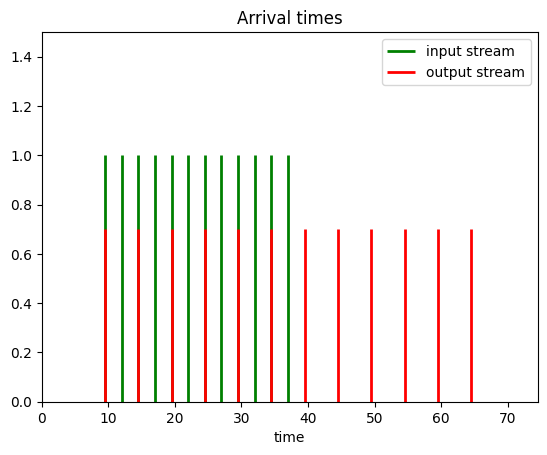

In [ ]:
"""
This file shows an example of a traffic shaper whose bucket size is
the same of the packet size and whose bucket rate is one half the input
packet rate.
In addition it shows a method of plotting packet arrival and exit times.
Copyright Dr. Greg M. Bernstein 2014
Released under the MIT license
"""
import simpy
import matplotlib.pyplot as plt

from SimComponents import PacketGenerator, PacketSink, ShaperTokenBucket


if __name__ == '__main__':
    def const_arrival():
        return 2.5

    def const_size():
        return 100.0
    env = simpy.Environment()
    pg = PacketGenerator(env, "SJSU", const_arrival, const_size, initial_delay=7.0, finish=35)
    pg2 = PacketGenerator(env, "SJSU", const_arrival, const_size, initial_delay=7.0, finish=35)
    ps = PacketSink(env,rec_arrivals=True, absolute_arrivals=True)
    ps2 = PacketSink(env,rec_arrivals=True, absolute_arrivals=True)
    source_rate = 8.0*const_size()/const_arrival()  # the average source rate
    bucket_rate = 0.5*source_rate
    bucket_size = 1.0*const_size()
    shaper = ShaperTokenBucket(env, bucket_rate, bucket_size)
    pg.out = ps
    pg2.out = shaper
    shaper.out = ps2
    env.run(until=10000)
    print(ps.arrivals)

    fig, axis = plt.subplots()
    axis.vlines(ps.arrivals, 0.0, 1.0,colors="g", linewidth=2.0, label='input stream')
    axis.vlines(ps2.arrivals, 0.0, 0.7, colors="r", linewidth=2.0, label='output stream')
    axis.set_title("Arrival times")
    axis.set_xlabel("time")
    axis.set_ylim([0, 1.5])
    axis.set_xlim([0, max(ps2.arrivals) + 10])
    axis.legend()
    #axis.set_ylabel("normalized frequency of occurrence")
    #fig.savefig("ArrivalHistogram.png")
    plt.show()

### Queueing Disciplines

[2.5, 3.75, 5.0, 6.25, 7.5, 8.75, 10.0, 11.25, 12.5, 13.75, 15.0, 16.25, 17.5, 18.75, 20.0, 21.25, 23.75, 26.25, 28.75, 31.25, 33.75, 36.25, 38.75, 41.25, 43.75, 46.25, 48.75, 51.25]


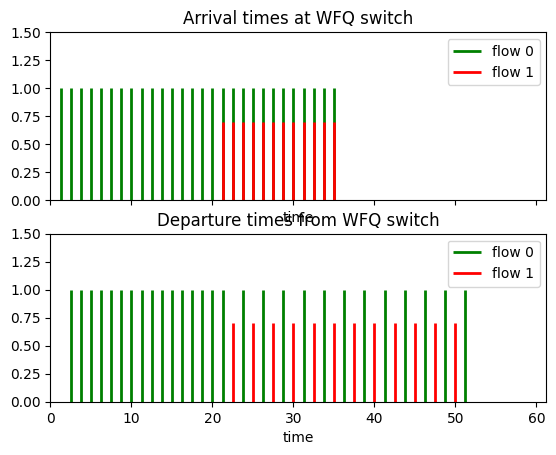

In [ ]:
"""
    Initial test of the WFQ queueing discipline implementation.
    Copyright 2014 Dr. Greg M. Bernstein

    We base our parameter explorations on the first source. We set the output rate of the
    virtual clock "switch port" at multiple of the first sources rate.
    We also set the "vtick" parameters to the virtual clock switch port relative to this rate.
"""
!pip install simpy
import simpy
import matplotlib.pyplot as plt

from SimComponents import PacketGenerator, PacketSink, FlowDemux, SnoopSplitter, \
    WFQServer, VirtualClockServer


if __name__ == '__main__':
    def const_arrival():
        return 1.25

    def const_arrival2():
        return 1.25

    def const_size():
        return 100.0
    env = simpy.Environment()
    pg = PacketGenerator(env, "SJSU", const_arrival, const_size, initial_delay=0.0, finish=35, flow_id=0)
    pg2 = PacketGenerator(env, "SJSU", const_arrival2, const_size, initial_delay=20.0, finish=35, flow_id=1)
    ps = PacketSink(env, rec_arrivals=True, absolute_arrivals=True)
    ps2 = PacketSink(env, rec_arrivals=True, absolute_arrivals=True)
    ps_snoop1 = PacketSink(env, rec_arrivals=True, absolute_arrivals=True)
    ps_snoop2 = PacketSink(env, rec_arrivals=True, absolute_arrivals=True)
    # Set up the virtual clock switch port
    source_rate = 8.0*const_size()/const_arrival()  # the average source rate
    phi_base = source_rate
    switch_port = WFQServer(env, source_rate, [0.5*phi_base, 0.5*phi_base])
    switch_port2 = VirtualClockServer(env, source_rate, [2.0/phi_base, 2.0/phi_base])
    demux = FlowDemux()
    snoop1 = SnoopSplitter()
    snoop2 = SnoopSplitter()
    pg.out = snoop1
    pg2.out = snoop2
    snoop1.out2 = ps_snoop1
    snoop2.out2 = ps_snoop2
    #  Comment out the next 4 lines and uncomment the following 4 lines to compare with virtual clock.
    type = "WFQ"
    snoop1.out1 = switch_port
    snoop2.out1 = switch_port
    switch_port.out = demux
    # snoop1.out1 = switch_port2
    # snoop2.out1 = switch_port2
    # switch_port2.out = demux
    # type = "VC"

    demux.outs = [ps, ps2]
    env.run(until=10000)
    print(ps.arrivals)

    fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True)
    ax1.vlines(ps_snoop1.arrivals, 0.0, 1.0, colors="g", linewidth=2.0, label='flow 0')
    ax1.vlines(ps_snoop2.arrivals, 0.0, 0.7, colors="r", linewidth=2.0, label='flow 1')
    ax1.set_title("Arrival times at {} switch".format(type))
    ax1.set_xlabel("time")
    ax1.set_ylim([0, 1.5])
    ax1.set_xlim([0, max(ps.arrivals) + 10])
    ax1.legend()
    ax2.vlines(ps.arrivals, 0.0, 1.0, colors="g", linewidth=2.0, label='flow 0')
    ax2.vlines(ps2.arrivals, 0.0, 0.7, colors="r", linewidth=2.0, label='flow 1')
    ax2.set_title("Departure times from {} switch".format(type))
    ax2.set_xlabel("time")
    ax2.set_ylim([0, 1.5])
    ax2.set_xlim([0, max(ps.arrivals) + 10])
    ax2.legend()
    plt.show()


In [ ]:
"""
Use of SimComponents to simulate the network of queues from Homework #6 problem 1, Fall 2014.
See corresponding solution set for mean delay calculation based on Burkes theorem.

Copyright 2014 Dr. Greg M. Bernstein
Released under the MIT license
"""
!pip install simpy

import random
import functools

import simpy

from SimComponents import PacketGenerator, PacketSink, SwitchPort, RandomBrancher


if __name__ == '__main__':
    # Set up arrival and packet size distributions
    # Using Python functools to create callable functions for random variates with fixed parameters.
    # each call to these will produce a new random value.
    mean_pkt_size = 100.0  # in bytes
    adist1 = functools.partial(random.expovariate, 2.0)
    adist2 = functools.partial(random.expovariate, 0.5)
    adist3 = functools.partial(random.expovariate, 0.6)
    sdist = functools.partial(random.expovariate, 1.0/mean_pkt_size)
    samp_dist = functools.partial(random.expovariate, 0.50)
    port_rate = 2.2*8*mean_pkt_size  # want a rate of 2.2 packets per second

    # Create the SimPy environment. This is the thing that runs the simulation.
    env = simpy.Environment()

    # Create the packet generators and sink
    def selector(pkt):
        return pkt.src == "SJSU1"

    def selector2(pkt):
        return pkt.src == "SJSU2"
    ps1 = PacketSink(env, debug=False, rec_arrivals=True, selector=selector)
    ps2 = PacketSink(env, debug=False, rec_waits=True, selector=selector2)
    pg1 = PacketGenerator(env, "SJSU1", adist1, sdist)
    pg2 = PacketGenerator(env, "SJSU2", adist2, sdist)
    pg3 = PacketGenerator(env, "SJSU3", adist3, sdist)
    branch1 = RandomBrancher(env, [0.75, 0.25])
    branch2 = RandomBrancher(env, [0.65, 0.35])
    switch_port1 = SwitchPort(env, port_rate)
    switch_port2 = SwitchPort(env, port_rate)
    switch_port3 = SwitchPort(env, port_rate)
    switch_port4 = SwitchPort(env, port_rate)

    # Wire packet generators, switch ports, and sinks together
    pg1.out = switch_port1
    switch_port1.out = branch1
    branch1.outs[0] = switch_port2
    switch_port2.out = branch2
    branch2.outs[0] = switch_port3
    branch2.outs[1] = switch_port4
    pg3.out = switch_port3
    pg2.out = switch_port4
    switch_port3.out = ps1
    switch_port4.out = ps2
    # Run it
    env.run(until=4000)
    print(ps2.waits[-10:])
    # print pm.sizes[-10:]
    # print ps.arrivals[-10:]
    print("average wait source 1 to output 3 = {}".format(sum(ps1.waits)/len(ps1.waits)))
    print("average wait source 2 to output 4 = {}".format(sum(ps2.waits)/len(ps2.waits)))
    print("packets sent {}".format(pg1.packets_sent + pg2.packets_sent))
    print("packets received: {}".format(len(ps2.waits)))
    # print "average system occupancy: {}".format(float(sum(pm.sizes))/len(pm.sizes))


[3.882162498924572, 2.2728754702538936, 2.204395663734431, 2.3241861799110666, 5.080325406608154, 2.259375799926147, 3.091412034273617, 3.549441084364389, 3.036546473654653, 3.0438517008260533]
average wait source 1 to output 3 = 8.750321057042646
average wait source 2 to output 4 = 0.861220448708396
packets sent 9849
packets received: 1950
